# 1. 乳がんデータ

https://ohke.hateblo.jp/entry/2019/02/16/230000

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# UCI Machine Learning Repositoryから乳がんデータセットをダウンロード
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url, header=None)

In [32]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [33]:
# Mは1, Bは0に置き換える
y = df[1]
y = y.str.replace('M', '1').str.replace('B', '0').astype(int)

# 3〜32列目を特徴量として使う
X = df.iloc[:, 2:]

In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 569, dtype: int64

In [35]:
X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
# 学習データとテストデータを4:1で分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [37]:
import xgboost as xgb

# 学習データからXGBoost用のデータを生成
dm_train = xgb.DMatrix(X_train, label=y_train)

# パラメータ
param = {
    'max_depth': 2, 
    'eta': 1, 
    'objective': 'binary:logistic'
}

# XGBoostで学習
model = xgb.train(param, dm_train)

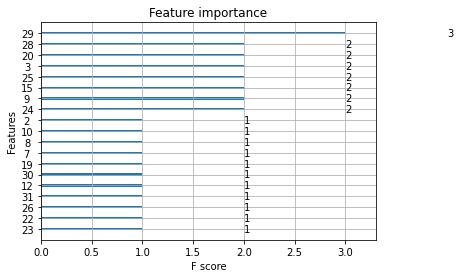

In [38]:
import matplotlib

# 特徴量の重要度を表示
xgb.plot_importance(model)

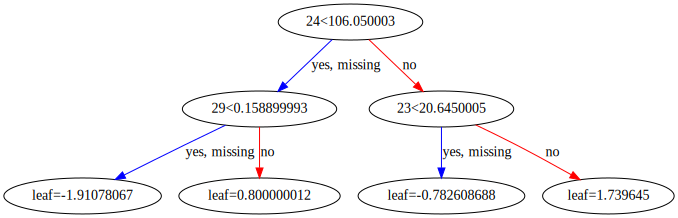

In [39]:
# 木の表示
xgb.to_graphviz(model)

In [41]:
# テスト用のデータを生成
dm_test = xgb.DMatrix(X_test)

# 予測
y_pred = model.predict(dm_test)
# array([2.4190381e-01, 9.9575341e-01, 3.6941297e-04, 9.9836344e-01,
#        ...

# 精度
accuracy = sum(((y_pred > 0.5) & (y_test == 1)) | ((y_pred <= 0.5) & (y_test == 0))) / len(y_pred)
# 0.956140350877193
accuracy

0.956140350877193

# 2. Original Document (途中)

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installation
import xgboost as xgb

In [ ]:
# Library
import numpy as np
import pandas as pd
import scipy 
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, lil_matrix

In [ ]:
# Dataset
data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)

dtrain = xgb.DMatrix(data, label=label, missing=np.NaN)

w = np.random.rand(5, 1)
dtrain = xgb.DMatrix(data, label=label, missing=np.NaN, weight=w)

dtrain.save_binary('/content/drive/MyDrive/MachineLearning/XGBoost/train.buffer')

In [ ]:
dtrain = xgb.DMatrix('/content/drive/MyDrive/MachineLearning/XGBoost/train.buffer')

[02:11:20] 5x10 matrix with 50 entries loaded from /content/drive/MyDrive/MachineLearning/XGBoost/train.buffer


In [ ]:
# Setting Parameters
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [ ]:
# 7 entities, each contains 10 features
data = np.random.rand(7, 10)
dtest = xgb.DMatrix(data)

In [ ]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]